**"Predicting User Churn in Waze: A Machine Learning Approach for Enhanced User Retention Strategies"**

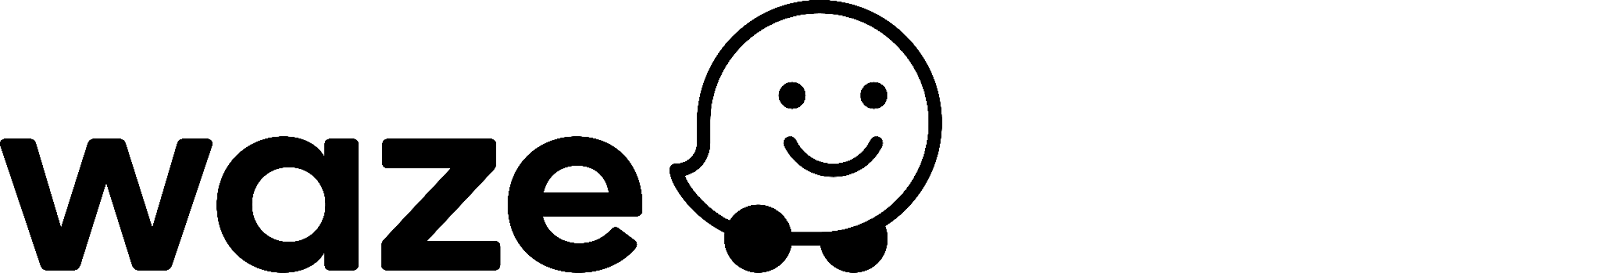

**Project goal:**

Waze leadership has asked your data team to develop a machine learning model to predict user churn. Churn quantifies the number of users who have uninstalled the Waze app or stopped using the app. This project focuses on monthly user churn. An accurate model will help prevent churn, improve user retention, and grow Waze’s business.

**Background:**

Waze’s free navigation app makes it easier for drivers around the world to get to where they want to go. Waze’s community of map editors, beta testers, translators, partners, and users helps make each drive better and safer.

**Scenario:**

Your team is in the early stages of their user churn project. Your project proposal has been approved and your team has been given access to Waze’s user data. To get clear insights, the data must first be inspected, organized, and prepared for analysis.

**Course 2 tasks:**

1. Import data
import some python libraries and also import 'waze_dataset.csv' file.

In [231]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm, gamma
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score

2. Create a dataframe

In [232]:
df=pd.read_csv('/content/waze_dataset.csv')
df.head(1)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android


3. Inspect data

In [233]:
df.shape

(14999, 13)

In [234]:
#Not necessary
df=df.drop(['ID'],axis=1)
df.head(1)

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android


In [235]:
df.columns

Index(['label', 'sessions', 'drives', 'total_sessions',
       'n_days_after_onboarding', 'total_navigations_fav1',
       'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives',
       'activity_days', 'driving_days', 'device'],
      dtype='object')

In [236]:
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


In [237]:
df.isnull().sum()

label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64

In [238]:
df.dtypes

label                       object
sessions                     int64
drives                       int64
total_sessions             float64
n_days_after_onboarding      int64
total_navigations_fav1       int64
total_navigations_fav2       int64
driven_km_drives           float64
duration_minutes_drives    float64
activity_days                int64
driving_days                 int64
device                      object
dtype: object

Break down the variables in the dataset:

1. **label**: This is a categorical variable. That column contains 700 null values. Data Type is 'object'.

2. **sessions**: This could represent the number of user sessions. That column contains 0 null value. Data Type is 'int64'.

3. **drives**: This might be the count of individual driving events. That column contains 0 null value. Data Type is 'int64'.

4. **total_sessions**: The cumulative total of sessions. That column contains 0 null value. Data Type is 'float64'.

5. **n_days_after_onboarding**: It looks like a time-related variable, possibly indicating the number of days after a user onboards. That column contains 0 null value. Data Type is 'int64'.

6. **total_navigations_fav1**: Possibly the total number of navigations related to a favorite location or feature 1. That column contains 0 null value. Data Type is 'int64'.

7. **total_navigations_fav2**: Similar to the above, but related to feature 2.That column contains 0 null value. Data Type is 'int64'.

8. **driven_km_drives**: The total distance driven in kilometers. That column contains 0 null value. Data Type is 'float64'.

9. **duration_minutes_drives**: The total duration of driving events in minutes.That column contains 0 null value. Data Type is 'float64'.

10. **activity_days**: The number of days with some activity.That column contains 0 null value. Data Type is 'int64'.

11. **driving_days**: The number of days specifically related to driving.That column contains 0 null value. Data Type is 'int64'.

12. **device**: The type of device used, assuming it's categorical.That column contains 0 null value. Data Type is 'object'.

4. Identify outliers


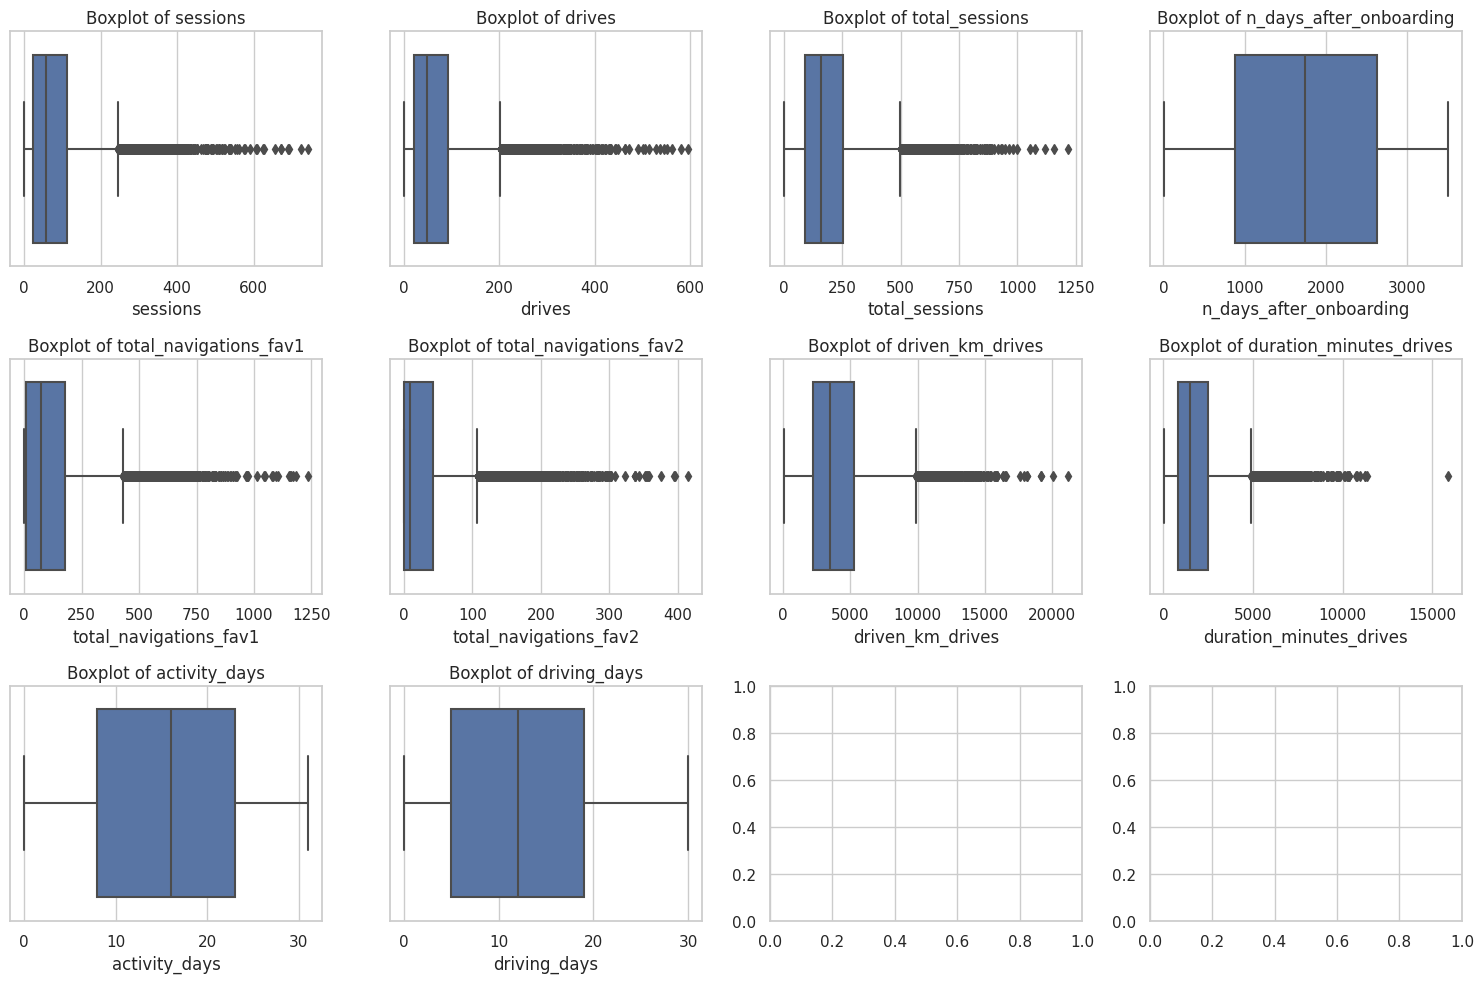

In [239]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Define the variables for boxplot
boxplot_vars = ['sessions', 'drives', 'total_sessions', 'n_days_after_onboarding',
                'total_navigations_fav1', 'total_navigations_fav2', 'driven_km_drives',
                'duration_minutes_drives', 'activity_days', 'driving_days']

# Create a 3x4 grid of subplots
fig, axes = plt.subplots(3, 4, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create boxplots for each variable and place them in the corresponding subplot
for i, var in enumerate(boxplot_vars):
    sns.boxplot(x=var, data=df, ax=axes[i])
    axes[i].set_title(f'Boxplot of {var}')

# Adjust layout to prevent clipping of titles
plt.tight_layout()
plt.show()


The columns 'sessions,' 'drives,' 'total_sessions,' 'total_navigations_fav1,' 'total_navigations_fav2,' 'driven_km_drives,' and 'duration_minutes_drives' contain outliers.

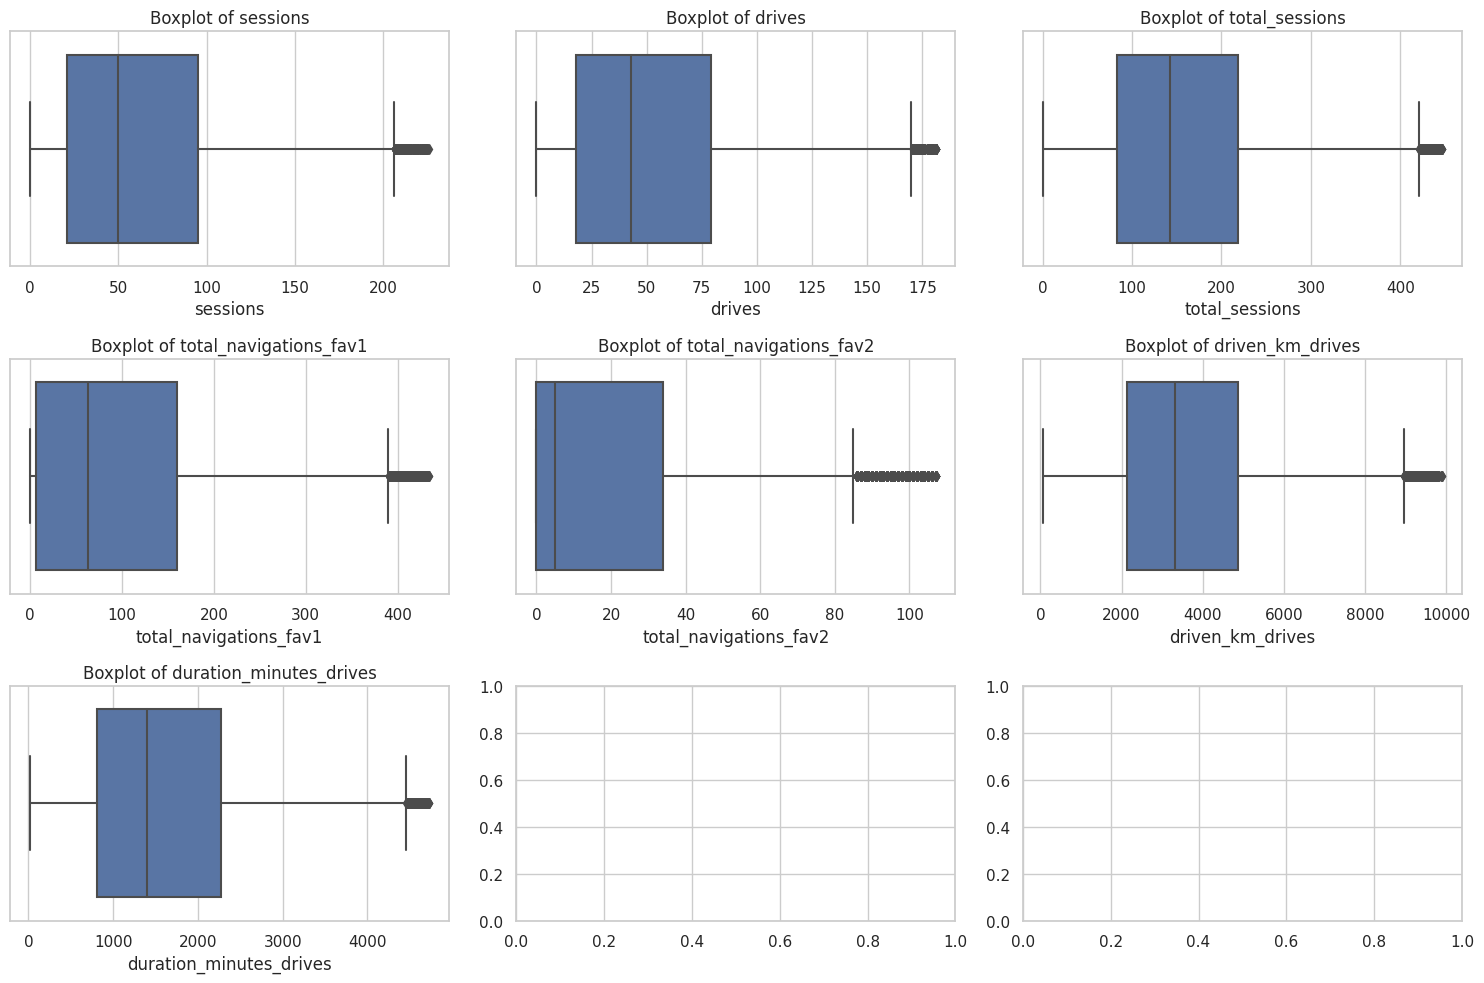

In [240]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Define the variables for boxplot
boxplot_vars = ['sessions', 'drives', 'total_sessions',
                'total_navigations_fav1','total_navigations_fav2',
                'driven_km_drives', 'duration_minutes_drives',]

# Remove outliers using the IQR method
for var in boxplot_vars:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    df = df[(df[var] >= lower_bound) & (df[var] <= upper_bound)]

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 10))  # Adjust the figure size if needed

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create boxplots for each variable and place them in the corresponding subplot
for i, var in enumerate(boxplot_vars):
    sns.boxplot(x=var, data=df, ax=axes[i])
    axes[i].set_title(f'Boxplot of {var}')

# Adjust layout to prevent clipping of titles
plt.tight_layout()
plt.show()


In [241]:
df.shape

(11232, 12)

After the removal of outliers, the dataset now consists of 11,232 rows.

5. Create a data visualization



5.1 Histograms/Distribution Plots:

For sessions, drives, total sessions, n days after onboarding, total navigations fav1, total navigations fav2, driven km drives, duration minutes drives, activity days, and driving days.
These plots can give you an overview of the distribution of each variable.

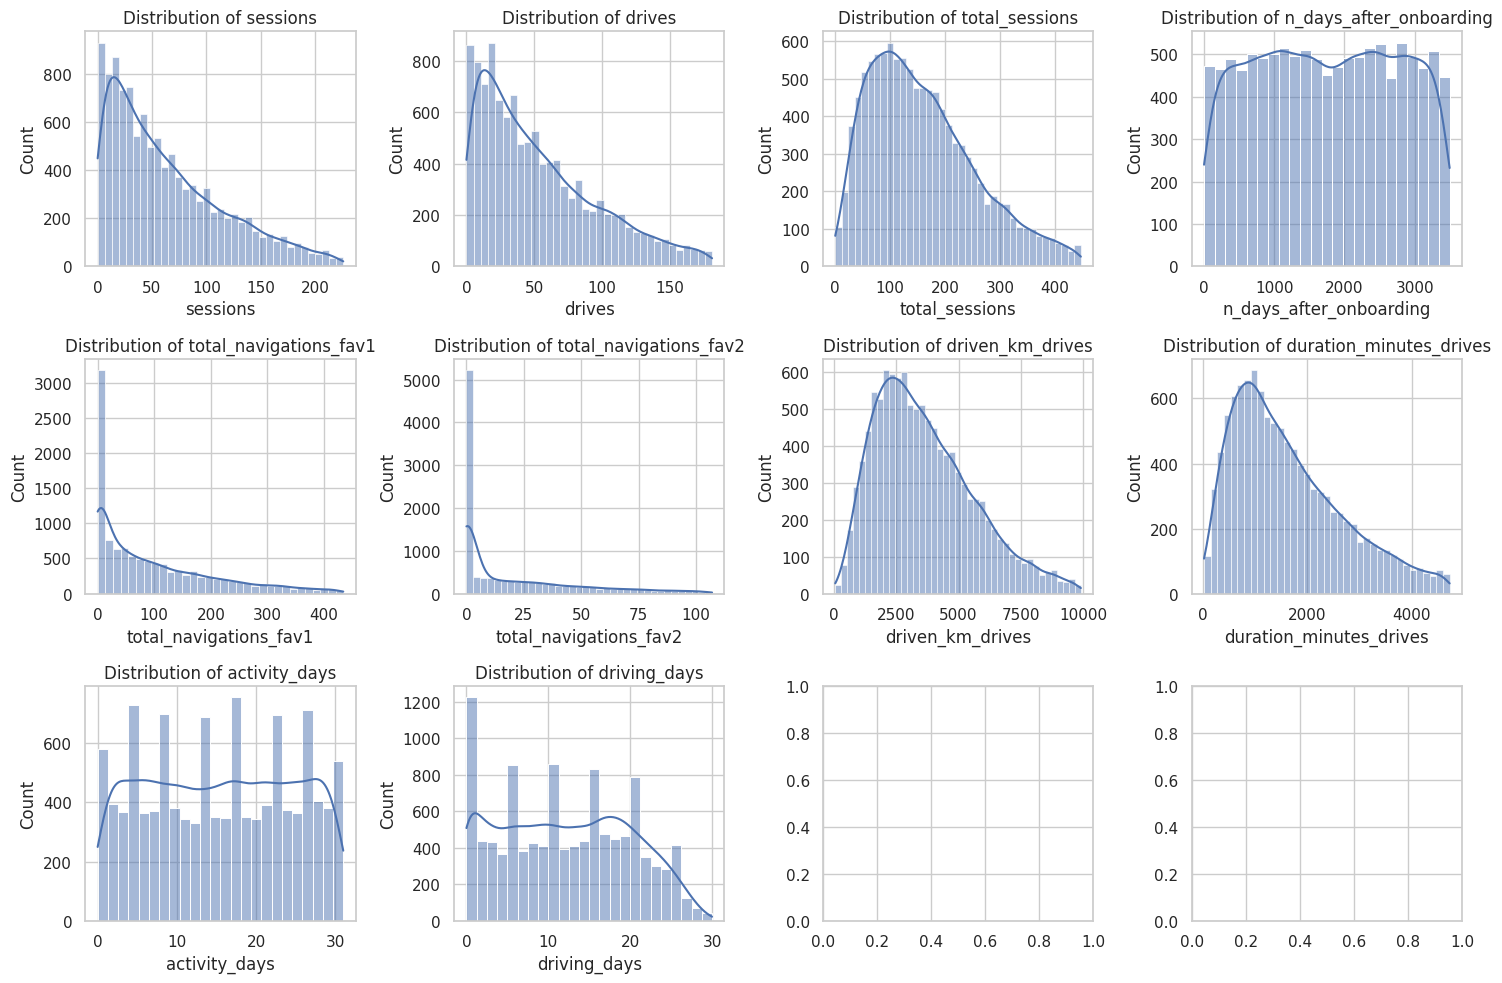

In [242]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Define the variables for histograms
histogram_vars = ['sessions', 'drives', 'total_sessions', 'n_days_after_onboarding',
                   'total_navigations_fav1', 'total_navigations_fav2', 'driven_km_drives',
                   'duration_minutes_drives', 'activity_days', 'driving_days']

# Create a 3x4 grid of subplots
fig, axes = plt.subplots(3, 4, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create histograms for each variable and place them in the corresponding subplot
for i, var in enumerate(histogram_vars):
    sns.histplot(df[var], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')

# Adjust layout to prevent clipping of titles
plt.tight_layout()
plt.show()


5.2 Bar Charts:

Bar chart for the count of each type of device.
Bar chart for activity days vs. driving days.

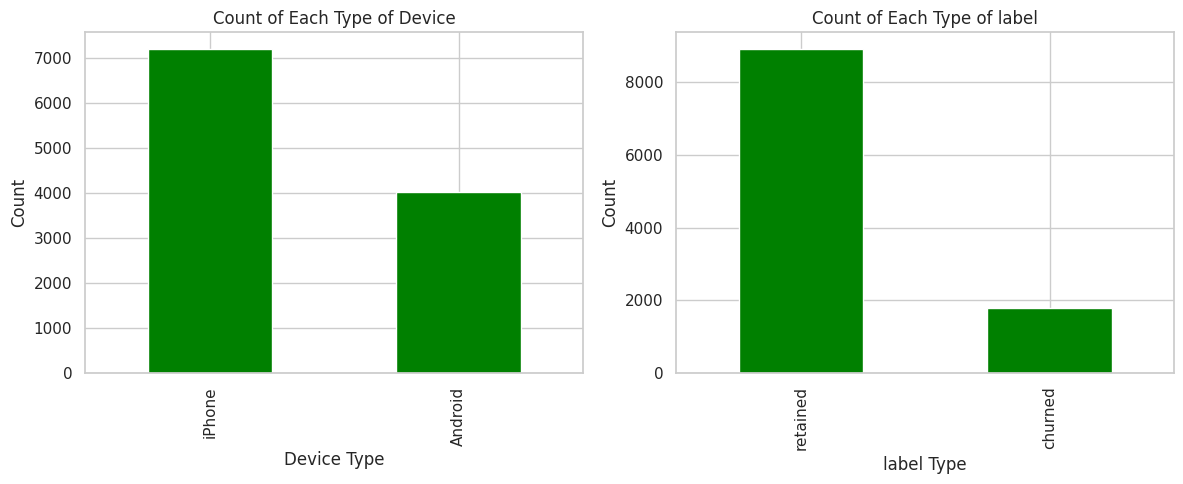

In [243]:
# Bar chart for the count of each type of device
plt.figure(figsize=(12, 5))

device_counts = df['device'].value_counts()
label_counts=df['label'].value_counts()

plt.subplot(1, 2, 1)
device_counts.plot(kind='bar', color='green')
plt.title('Count of Each Type of Device')
plt.xlabel('Device Type')
plt.ylabel('Count')

## Bar chart for the count of each type of label
plt.subplot(1, 2, 2)
label_counts.plot(kind='bar', color='green')
plt.title('Count of Each Type of label')
plt.xlabel('label Type')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


5.3 Pie Chart:

Pie chart to show the distribution of sessions or drives across different categories.

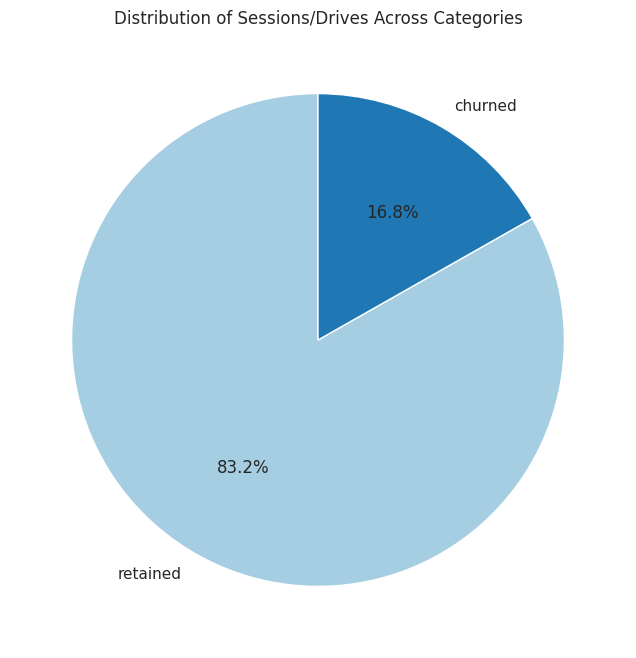

In [244]:
# Calculate the distribution of sessions/drives across different categories
category_distribution = df['label'].value_counts()

# Set up the matplotlib figure
plt.figure(figsize=(8, 8))

# Create a pie chart
plt.pie(category_distribution, labels=category_distribution.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Add a title
plt.title('Distribution of Sessions/Drives Across Categories')

# Show the plot
plt.show()


5.4 Correlation Heatmap:

To visualize the correlation between different numerical variables.

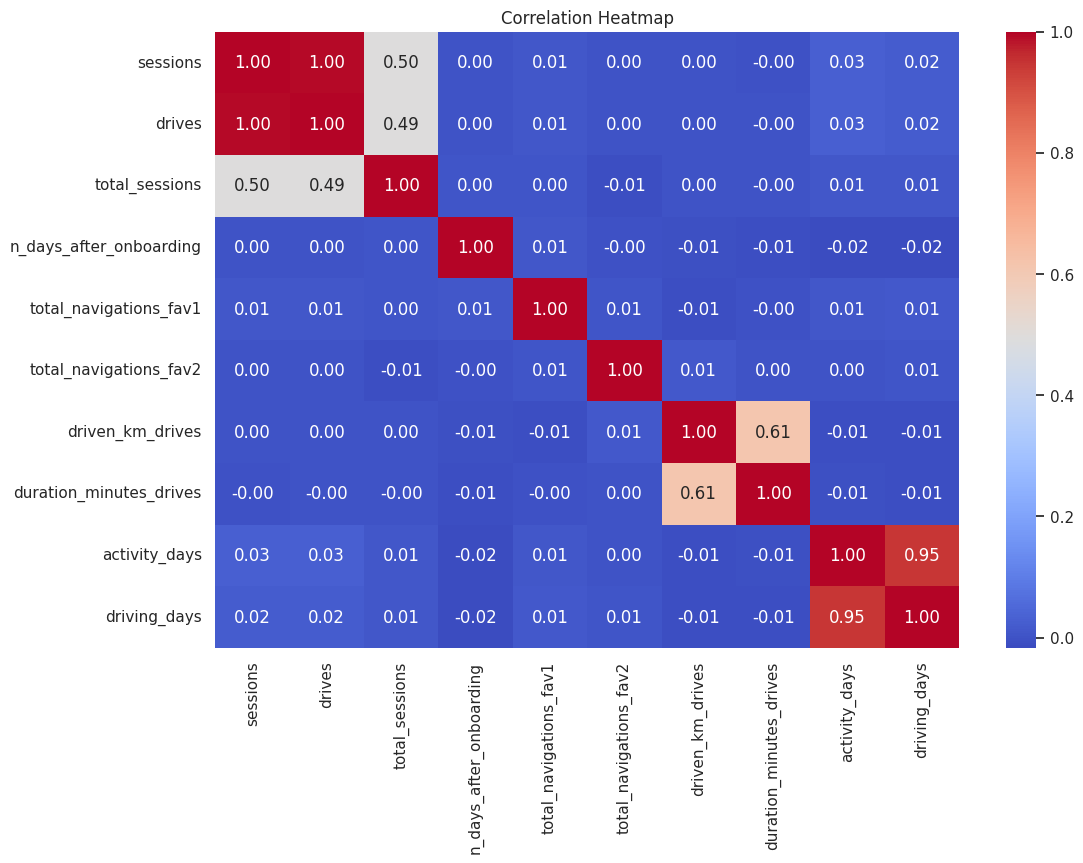

In [245]:
# Selecting numerical variables for correlation
numerical_vars = ['sessions', 'drives', 'total_sessions', 'n_days_after_onboarding',
                  'total_navigations_fav1', 'total_navigations_fav2', 'driven_km_drives',
                  'duration_minutes_drives', 'activity_days', 'driving_days']

# Calculate the correlation matrix
correlation_matrix = df[numerical_vars].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add a title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


5.5 Violin Plots:

For a visual representation of the distribution of variables like driven km drives and duration minutes drives.

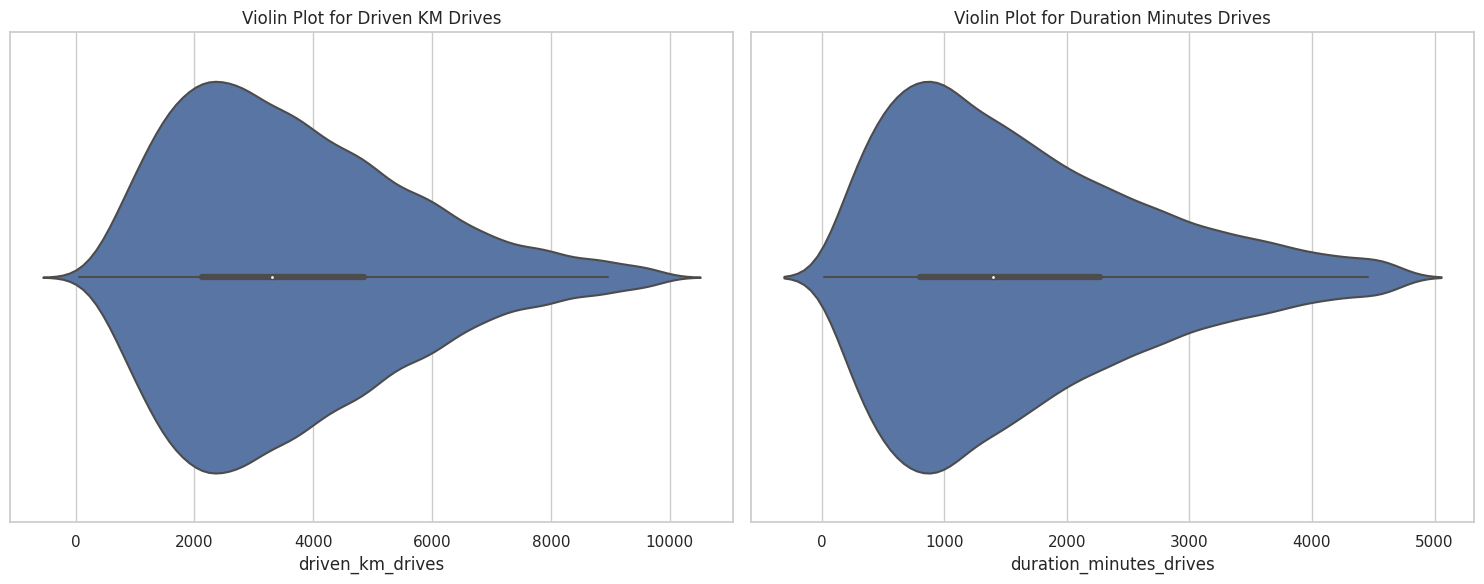

In [246]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a 1x2 grid for violin plots
plt.figure(figsize=(15, 6))

# Violin plot for driven km drives
plt.subplot(1, 2, 1)
sns.violinplot(x=df['driven_km_drives'])
plt.title('Violin Plot for Driven KM Drives')

# Violin plot for duration minutes drives
plt.subplot(1, 2, 2)
sns.violinplot(x=df['duration_minutes_drives'])
plt.title('Violin Plot for Duration Minutes Drives')

# Adjust layout
plt.tight_layout()
plt.show()


5.6 Pair Plots:

Scatterplots of all pairs of numerical variables for a quick overview of relationships.

In [247]:
# Set the style of seaborn
sns.set(style="ticks")

# Create a pair plot
sns.pairplot(df, diag_kind='kde')  # 'kde' for kernel density estimate on the diagonal

# Show the plot
plt.show()


Output hidden; open in https://colab.research.google.com to view.

5.7 3D Scatter Plots:

If applicable, a 3D scatter plot for three numerical variables, such as driven km drives, duration minutes drives, and total sessions.

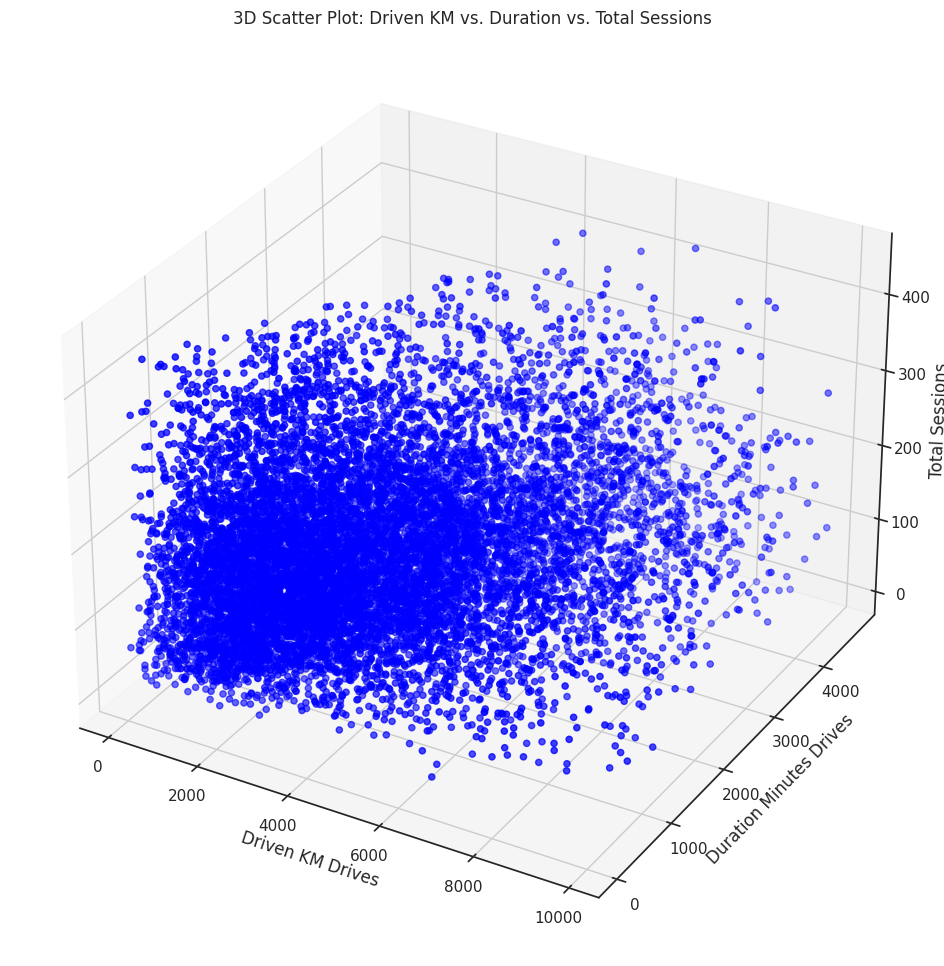

In [248]:
# Set up the figure
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for driven km drives, duration minutes drives, and total sessions
ax.scatter(df['driven_km_drives'], df['duration_minutes_drives'], df['total_sessions'], c='blue', marker='o')

# Set labels and title
ax.set_xlabel('Driven KM Drives')
ax.set_ylabel('Duration Minutes Drives')
ax.set_zlabel('Total Sessions')
ax.set_title('3D Scatter Plot: Driven KM vs. Duration vs. Total Sessions')

# Show the plot
plt.show()


6. Share an executive summary with the Waze data team

There are 14999 rows and 13 columns  in the dataset. We need to drop the 'ID' column as it is unnecessary. The columns 'label' have an 'object' data type, 'pesessions' has an 'int64' data type, 'drives' has an 'int64' data type, 'total_sessions' has a 'float64' data type, 'n_days_after_onboarding' has an 'int64' data type,'total_navigations_fav1' has an 'int64' data type, 'total_navigations_fav2' has an 'int64' data type, 'driven_km_drives' has a 'float64' data type, 'duration_minutes_drives' has a 'float64' data type, 'activity_days' has an 'int64' data type, 'driving_days' has an 'int64' data type, and 'device' has an 'object' data type.

The 'label' column contains 700 null values, while the remaining columns are free of any null values.

The columns 'sessions,' 'drives,' 'total_sessions,' 'total_navigations_fav1,' 'total_navigations_fav2,' 'driven_km_drives,' and 'duration_minutes_drives' exhibit outliers. Following the removal of outliers, our dataset now comprises 11,232 rows and 12 columns.

In section 5.1, histogram graphs depict the distributions of various variables. Specifically, the distributions of 'sessions,' 'drives,' 'total_sessions,' 'total_navigations_fav1,' 'total_navigations_fav2,' 'driven_km_drives,' and 'duration_minutes_drives' are positively skewed. On the other hand, the distributions of 'activity_days' and 'n_days_after_onboarding' exhibit normal distributions.

Within section 5.2, two Bar Charts are presented. The first chart illustrates the 'Count of Each Type of Device,' indicating that the frequency value for iPhones exceeds 7000, while that for Android devices is close to 4000. In the second chart, displaying the 'Count of Each Type of label,' the frequency value for 'retained' surpasses 8000, while the frequency value for 'churned' is approximately 2000.

In section 5.3, a Pie Chart is showcased, revealing that the percentage of 'retained' instances is 83.2%, while the percentage of 'churned' instances is 16.8%.

Within section 5.4, a Correlation Heatmap is displayed, serving as a visual tool to discern patterns and trends in the dataset. This heatmap is particularly valuable for unraveling the relationships between various variables and understanding their correlations.

In section 5.5, a set of Violin Plots is presented, offering a valuable tool in data science for visualizing dataset distributions. These plots aid in comprehending distribution shapes, pinpointing outliers, and facilitating side-by-side comparisons of multiple distributions. Leveraging these plots, data scientists can efficiently analyze data, discern patterns, and make well-informed decisions through insights gleaned from the visual representations.

In section 5.6, a set of Pair Plots is presented. A large number of data points is essential for various reasons. Firstly, it helps in training machine learning models, which require a significant amount of data to learn patterns and relationships between variables. A higher number of data points increases the accuracy and reliability of the model's predictions. Secondly, it allows for better generalization of the model, as it can learn from a diverse set of data points, reducing the risk of overfitting. Lastly, having a large dataset enables data scientists to perform more in-depth analysis, identify trends, and uncover insights that might not be apparent in a smaller dataset.

Within section 5.7, a 3D Scatter Plot is showcased, depicting the columns 'driven_km_drives,' 'duration_minutes_drives,' and 'total_sessions.' This visual representation in 3D format enhances our understanding of the dataset, offering valuable insights into the relationships among these variables.

6. Handling null value

In [249]:
df.shape

(11232, 12)

In [250]:
df.head(1)

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android


In [251]:
df.isnull().sum()

label                      514
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64


After the removal of outliers from the dataset, the 'label' column now contains 514 null values, while all other columns are devoid of any missing values.

In [252]:
df = df.dropna(subset=['label'])
df.shape

(10718, 12)

After null value removal, the dataset comprises 10,718 rows and 12 columns.

In [253]:
df.isnull().sum()

label                      0
sessions                   0
drives                     0
total_sessions             0
n_days_after_onboarding    0
total_navigations_fav1     0
total_navigations_fav2     0
driven_km_drives           0
duration_minutes_drives    0
activity_days              0
driving_days               0
device                     0
dtype: int64

In [254]:
set(df['label'])

{'churned', 'retained'}

The 'label' column contains two distinct values: 'churned' and 'retained'. For the purpose of prediction, the selected target value is 'churned'.

7. Feature Engineering

In [255]:
# Feature Engineering only for label column 0 and 1
'''label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])
df.head(2)'''

"label_encoder = LabelEncoder()\ndf['label'] = label_encoder.fit_transform(df['label'])\ndf.head(2)"

In [256]:
# Feature Engineering for 'label' divided into two parts. One part is 'label_churned' and another one is 'label_retained'.

# Using pandas get_dummies for binary encoding
df = pd.get_dummies(df, columns=['label'], prefix='label')

# Display the modified DataFrame
print(df.head())

   sessions  drives  total_sessions  n_days_after_onboarding  \
2       114      95      135.522926                     2651   
3        49      40       67.589221                       15   
4        84      68      168.247020                     1562   
5       113     103      279.544437                     2637   
6         3       2      236.725314                      360   

   total_navigations_fav1  total_navigations_fav2  driven_km_drives  \
2                       0                       0       3059.148818   
3                     322                       7        913.591123   
4                     166                       5       3950.202008   
5                       0                       0        901.238699   
6                     185                      18       5249.172828   

   duration_minutes_drives  activity_days  driving_days   device  \
2              1610.735904             14             8  Android   
3               587.196542              7           

In [257]:
df.shape

(10718, 13)

In [258]:
print(set(df['label_churned']))
print(len(df['label_churned']))
print(df['label_churned'])

{0, 1}
10718
2        0
3        0
4        0
5        0
6        0
        ..
14992    0
14994    0
14995    0
14997    1
14998    0
Name: label_churned, Length: 10718, dtype: uint8


In [259]:
# Counting the number of 0s in 'label_churned'
count_zeros = (df['label_churned'] == 0).sum()

# Display the count
print("Number of 0s in 'label_churned':", count_zeros)


Number of 0s in 'label_churned': 8919


8. Feature Selection

In [260]:
'''columns_to_drop = ['label_retained' ]

df=df.drop(columns_to_drop,axis=1)
df.head(2)'''

"columns_to_drop = ['label_retained' ]\n\ndf=df.drop(columns_to_drop,axis=1)\ndf.head(2)"

In [261]:
#Here the required column is selected
columns_to_drop = ['total_sessions','n_days_after_onboarding',
      'total_navigations_fav1','total_navigations_fav2',
      'driven_km_drives','duration_minutes_drives','device','label_retained']

df=df.drop(columns_to_drop,axis=1)
df.head(2)

,sessions,drives,activity_days,driving_days,label_churned
2,114,95,14,8,0
3,49,40,7,3,0


9. Model Testing and Training

In [262]:
# Select features and target
X = df[['sessions', 'drives', 'activity_days', 'driving_days']]
y=df['label_churned']
#y = df['label']

In [263]:
# Split the data into training and testing sets
X_train_logit, X_test_logit, y_train_logit, y_test_logit = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but recommended for logistic regression)
scaler = StandardScaler()
X_train_scaled_logit = scaler.fit_transform(X_train_logit)
X_test_scaled_logit = scaler.transform(X_test_logit)

# Create a logistic regression model
model_logit = LogisticRegression()

# Train the model
model_logit.fit(X_train_scaled_logit, y_train_logit)

# Make predictions on the test set
y_pred_logit = model_logit.predict(X_test_scaled_logit)

# Evaluate the model
accuracy_logit = accuracy_score(y_test_logit, y_pred_logit)
conf_matrix_logit = confusion_matrix(y_test_logit, y_pred_logit)
classification_rep_logit = classification_report(y_test_logit, y_pred_logit)
print('========================================================')
print(f'Accuracy: {accuracy_logit}')
print('========================================================')
print(f'Confusion Matrix:\n{conf_matrix_logit}')
print('========================================================')
print(f'Classification Report:\n{classification_rep_logit}')

mae_logit = mean_absolute_error(y_test_logit, y_pred_logit)
mse_logit = mean_squared_error(y_test_logit, y_pred_logit)
rmse_logit = mean_squared_error(y_test_logit, y_pred_logit, squared=False)
r2_logit = r2_score(y_test_logit, y_pred_logit)
print('========================================================')
print(f'Mean Absolute Error: {mae_logit}')
print(f'Mean Squared Error: {mse_logit}')
print(f'Root Mean Squared Error: {rmse_logit}')
print(f'R-squared: {r2_logit}')
print('========================================================')

Accuracy: 0.8255597014925373
Confusion Matrix:
[[1770    0]
 [ 374    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.90      1770
           1       0.00      0.00      0.00       374

    accuracy                           0.83      2144
   macro avg       0.41      0.50      0.45      2144
weighted avg       0.68      0.83      0.75      2144

Mean Absolute Error: 44.48227611940298
Mean Squared Error: 0.17444029850746268
Root Mean Squared Error: 0.4176605062816721
R-squared: -0.21129943502824866


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


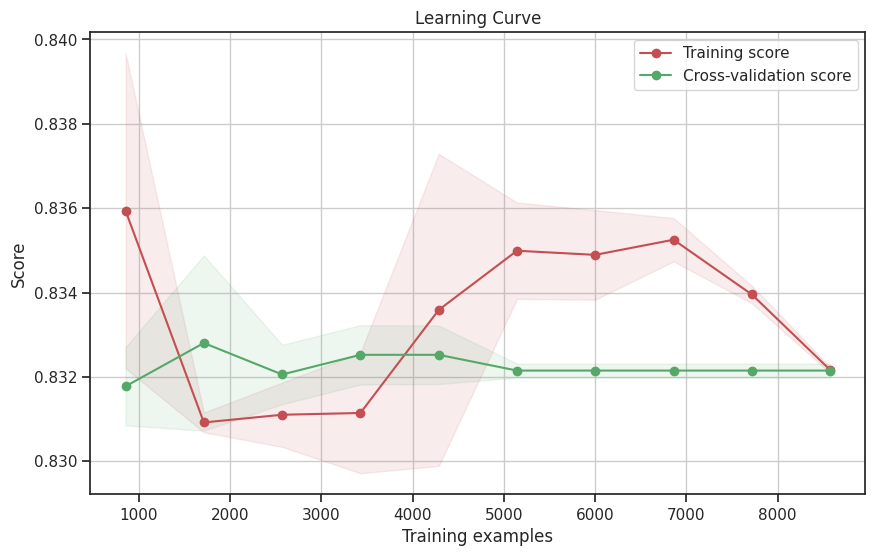

In [264]:
# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    model_logit, X_scaled, y, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

# Customize the plot
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [265]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
dt_predictions = dt_model.predict(X_test)
print('========================================================')
# Evaluate the Decision Tree model
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_predictions))
print('========================================================')
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_predictions))
print('========================================================')

Decision Tree Accuracy: 0.7369402985074627
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1770
           1       0.24      0.24      0.24       374

    accuracy                           0.74      2144
   macro avg       0.54      0.54      0.54      2144
weighted avg       0.74      0.74      0.74      2144



In [266]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)
print('========================================================')
# Evaluate the Random Forest model
print("\nRandom Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print('========================================================')
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))
print('========================================================')


Random Forest Accuracy: 0.7877798507462687
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1770
           1       0.29      0.16      0.20       374

    accuracy                           0.79      2144
   macro avg       0.57      0.54      0.54      2144
weighted avg       0.74      0.79      0.76      2144



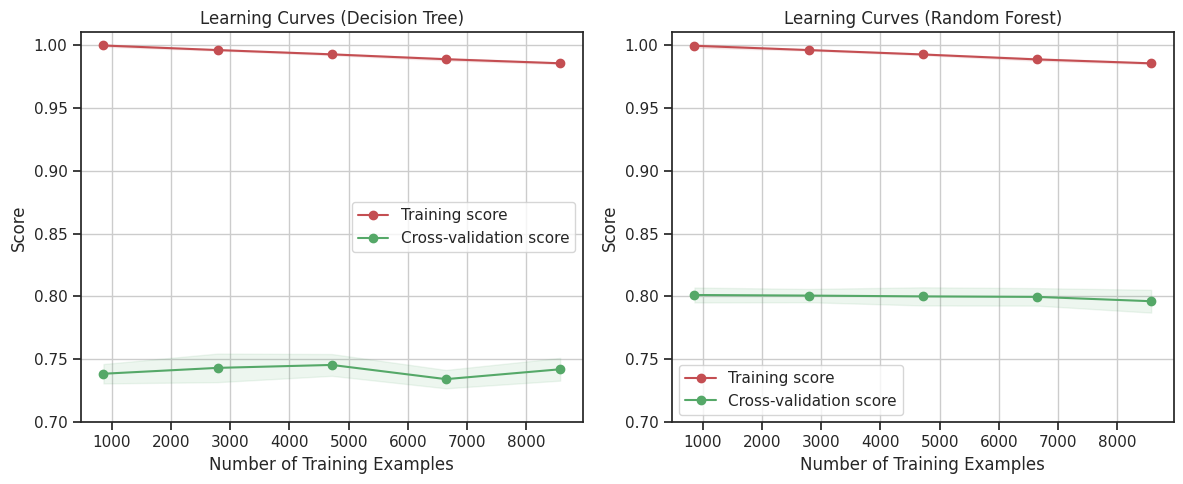

In [267]:
def plot_learning_curve(ax, estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5),
                        xlabel="Training examples", ylabel="Score"):

    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax.grid()

    ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    ax.legend(loc="best")

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot learning curve for Decision Tree
title_dt = "Learning Curves (Decision Tree)"
xlabel_dt = "Number of Training Examples"
ylabel_dt = "Score"
plot_learning_curve(axes[0], dt_model, title_dt, X, y, ylim=(0.7, 1.01), cv=5, n_jobs=-1, xlabel=xlabel_dt, ylabel=ylabel_dt)

# Plot learning curve for Random Forest
title_rf = "Learning Curves (Random Forest)"
xlabel_rf = "Number of Training Examples"
ylabel_rf = "Score"
plot_learning_curve(axes[1], rf_model, title_rf, X, y, ylim=(0.7, 1.01), cv=5, n_jobs=-1, xlabel=xlabel_rf, ylabel=ylabel_rf)

# Adjust layout
plt.tight_layout()
plt.show()
